In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# 加载MNIST数据集
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# print(x_train.shape)
# 数据预处理
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype("float32") / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype("float32") / 255.0

# 将标签转化为one-hot编码
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [20]:
# 构建CNN模型
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [21]:
# 编译模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [22]:
# 训练模型
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8466 - loss: 0.4786 - val_accuracy: 0.9838 - val_loss: 0.0558
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9821 - loss: 0.0559 - val_accuracy: 0.9873 - val_loss: 0.0460
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9877 - loss: 0.0380 - val_accuracy: 0.9875 - val_loss: 0.0403
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9909 - loss: 0.0280 - val_accuracy: 0.9878 - val_loss: 0.0392
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9926 - loss: 0.0229 - val_accuracy: 0.9887 - val_loss: 0.0419


In [23]:

# 测试模型
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9865 - loss: 0.0453
Test accuracy: 0.989300012588501


<Figure size 640x480 with 0 Axes>

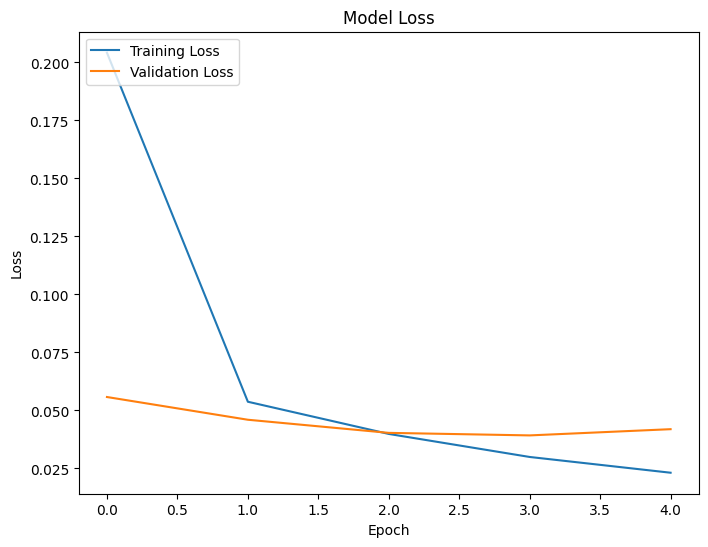

In [26]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.gcf().set_facecolor('white')
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc="upper left")
    plt.show()
    plt.show()

plot_loss(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


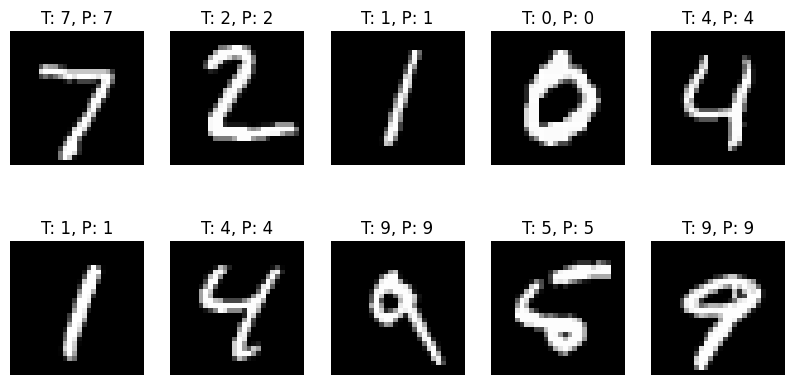

In [25]:

# 可视化部分预测结果
def plot_predictions(images, labels, predictions):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap="gray")
        true_label = np.argmax(labels[i])
        pred_label = np.argmax(predictions[i])
        plt.title(f"T: {true_label}, P: {pred_label}")
        plt.axis("off")
    plt.show()

predictions = model.predict(x_test[:10])
plot_predictions(x_test[:10], y_test[:10], predictions)
